# Importing Libraries

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from soccerplots.radar_chart import Radar

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Read in data

In [3]:
shotData = pd.read_csv('/home/ayodeji/Downloads/Documents/Football Analytics/2020_21_EPL_Shot.csv')
metaData = pd.read_csv('/home/ayodeji/Downloads/Documents/Football Analytics/2020_21_EPL_Meta.csv')

# Shot Data

In [4]:
shotData.head()

,h_team,id,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Arsenal,399642,21,MissedShots,0.719,0.404,0.014850,Thomas Partey,h,2328,OpenPlay,2020,RightFoot,14615,Newcastle United,3,0,2021-01-18 20:00:00,Bukayo Saka,Pass
1,Arsenal,399654,62,BlockedShot,0.689,0.507,0.015112,Granit Xhaka,h,204,OpenPlay,2020,LeftFoot,14615,Newcastle United,3,0,2021-01-18 20:00:00,Emile Smith-Rowe,Pass
2,Arsenal,393084,91,ShotOnPost,0.850,0.489,0.024479,Rob Holding,h,1749,SetPiece,2020,Head,14555,Southampton,1,1,2020-12-16 18:00:00,Bukayo Saka,Cross
3,Arsenal,377757,67,BlockedShot,0.778,0.437,0.030592,Jarrod Bowen,a,1776,OpenPlay,2020,LeftFoot,14099,West Ham,2,1,2020-09-19 19:00:00,NaN,None
4,Arsenal,381200,27,SavedShot,0.891,0.564,0.055482,Eddie Nketiah,h,6482,OpenPlay,2020,Head,14465,Sheffield United,2,1,2020-10-04 13:00:00,Kieran Tierney,Cross


In [5]:
shotData.shape

(9230, 20)

In [6]:
shotData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9230 entries, 0 to 9229
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   h_team           9230 non-null   object 
 1   id               9230 non-null   int64  
 2   minute           9230 non-null   int64  
 3   result           9230 non-null   object 
 4   X                9230 non-null   float64
 5   Y                9230 non-null   float64
 6   xG               9230 non-null   float64
 7   player           9230 non-null   object 
 8   h_a              9230 non-null   object 
 9   player_id        9230 non-null   int64  
 10  situation        9230 non-null   object 
 11  year             9230 non-null   int64  
 12  shotType         9230 non-null   object 
 13  match_id         9230 non-null   int64  
 14  a_team           9230 non-null   object 
 15  h_goals          9230 non-null   int64  
 16  a_goals          9230 non-null   int64  
 17  date          

In [7]:
shotData.describe

<bound method NDFrame.describe of                        h_team      id  minute       result      X      Y        xG               player h_a  player_id situation  year   shotType  match_id            a_team  h_goals  a_goals                 date   player_assisted lastAction
0                     Arsenal  399642      21  MissedShots  0.719  0.404  0.014850        Thomas Partey   h       2328  OpenPlay  2020  RightFoot     14615  Newcastle United        3        0  2021-01-18 20:00:00       Bukayo Saka       Pass
1                     Arsenal  399654      62  BlockedShot  0.689  0.507  0.015112         Granit Xhaka   h        204  OpenPlay  2020   LeftFoot     14615  Newcastle United        3        0  2021-01-18 20:00:00  Emile Smith-Rowe       Pass
2                     Arsenal  393084      91   ShotOnPost  0.850  0.489  0.024479          Rob Holding   h       1749  SetPiece  2020       Head     14555       Southampton        1        1  2020-12-16 18:00:00       Bukayo Saka      Cros

<AxesSubplot:>

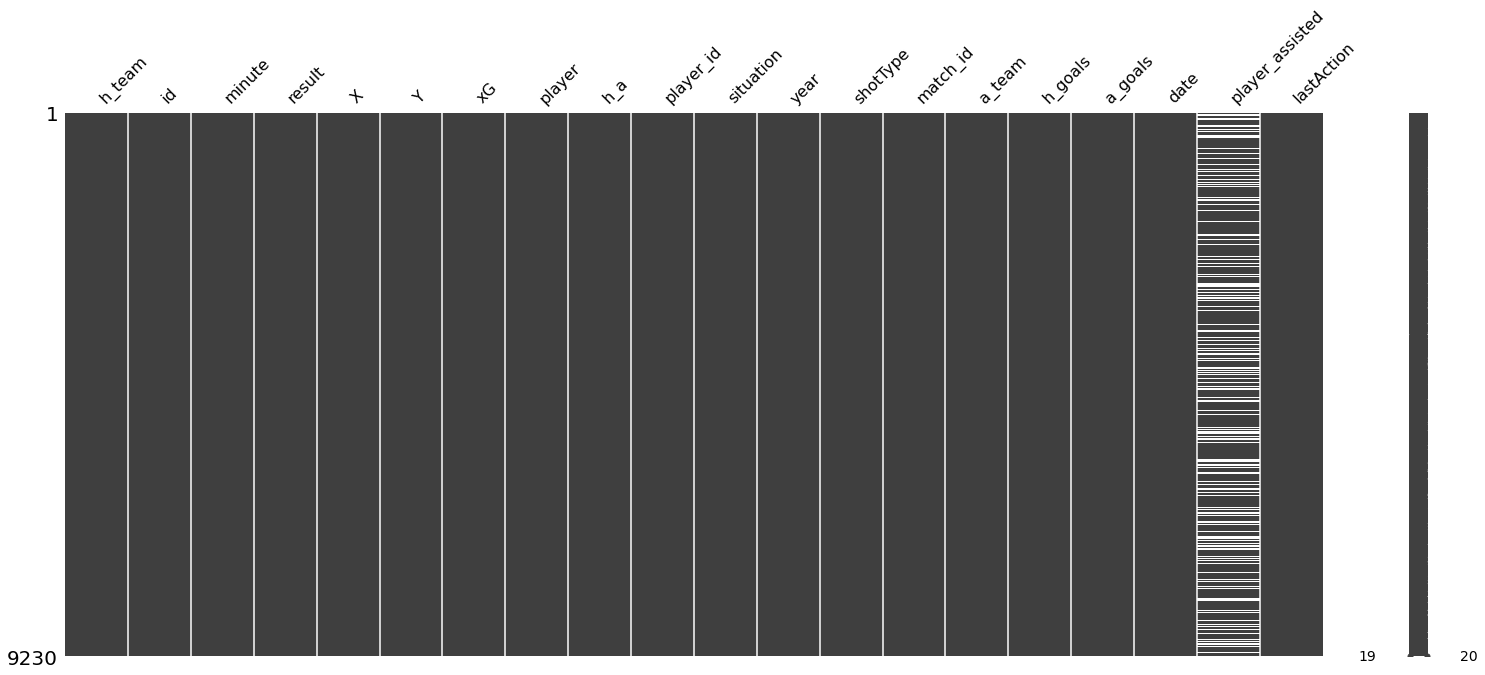

In [8]:
missingno.matrix(shotData)

In [9]:
# Dropping the player_assisted column because it has a lot of missing values
shotData = shotData.drop(['player_assisted'], axis = 1)

In [10]:
shotData.head()

,h_team,id,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,a_team,h_goals,a_goals,date,lastAction
0,Arsenal,399642,21,MissedShots,0.719,0.404,0.014850,Thomas Partey,h,2328,OpenPlay,2020,RightFoot,14615,Newcastle United,3,0,2021-01-18 20:00:00,Pass
1,Arsenal,399654,62,BlockedShot,0.689,0.507,0.015112,Granit Xhaka,h,204,OpenPlay,2020,LeftFoot,14615,Newcastle United,3,0,2021-01-18 20:00:00,Pass
2,Arsenal,393084,91,ShotOnPost,0.850,0.489,0.024479,Rob Holding,h,1749,SetPiece,2020,Head,14555,Southampton,1,1,2020-12-16 18:00:00,Cross
3,Arsenal,377757,67,BlockedShot,0.778,0.437,0.030592,Jarrod Bowen,a,1776,OpenPlay,2020,LeftFoot,14099,West Ham,2,1,2020-09-19 19:00:00,None
4,Arsenal,381200,27,SavedShot,0.891,0.564,0.055482,Eddie Nketiah,h,6482,OpenPlay,2020,Head,14465,Sheffield United,2,1,2020-10-04 13:00:00,Cross


In [11]:
shot_columns = list(shotData.columns)
shot_columns

['h_team',
 'id',
 'minute',
 'result',
 'X',
 'Y',
 'xG',
 'player',
 'h_a',
 'player_id',
 'situation',
 'year',
 'shotType',
 'match_id',
 'a_team',
 'h_goals',
 'a_goals',
 'date',
 'lastAction']

In [12]:
player_xG  = pd.DataFrame(shotData.groupby(['player_id', 'player']).xG.sum())
player_xG.sort_values(by='xG', ascending = False, inplace = True)
# Returning the top 10 EPL players with the highest expected goals
player_xG = player_xG[:10].reset_index()
player_xG

,player_id,player,xG
0,647,Harry Kane,22.174859
1,1250,Mohamed Salah,20.250847
2,755,Jamie Vardy,19.942946
3,822,Patrick Bamford,18.401863
4,5555,Dominic Calvert-Lewin,18.210514
5,8865,Ollie Watkins,16.280178
6,1228,Bruno Fernandes,16.019454
7,838,Sadio Mané,14.828548
8,531,Michail Antonio,14.138839
9,3621,Neal Maupay,13.773535


<AxesSubplot:xlabel='player', ylabel='xG'>

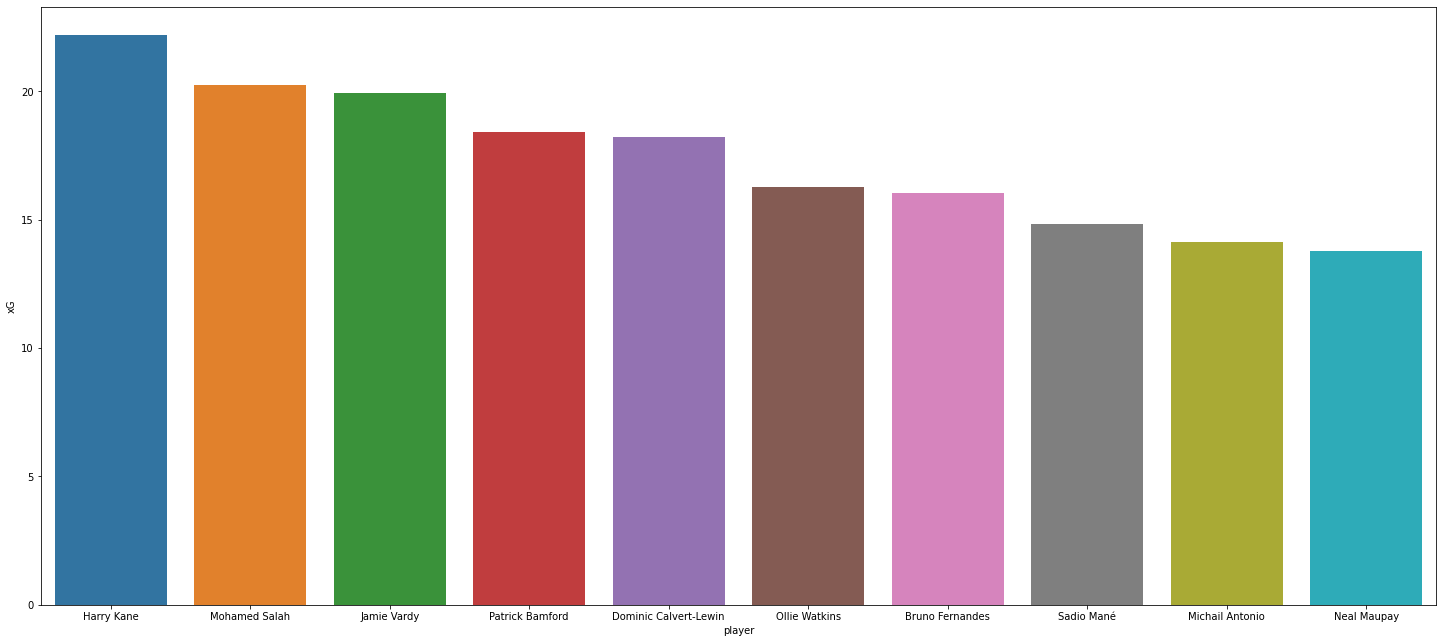

In [13]:
plt.figure(figsize = (25,11))
sns.barplot(x = 'player', y ='xG', data = player_xG)

# Meta data

In [14]:
metaData.head()

,player_id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_name,npg,npxG,xGChain,xGBuildup,year
0,8865,Ollie Watkins,37,3330,14,16.280178,5,5.314029,98,45,2,1,F,Aston Villa,13,14.757840,22.014021,5.334991,2020
1,5612,Anwar El Ghazi,28,1612,10,9.037518,0,1.882866,64,26,2,0,F M S,Aston Villa,6,5.992842,7.845563,2.691346,2020
2,695,Bertrand Traoré,36,2362,7,6.304105,6,4.570988,64,35,1,0,F M S,Aston Villa,7,6.304105,9.835355,1.332214,2020
3,675,Jack Grealish,26,2187,6,5.192684,10,9.334137,50,81,5,0,F M S,Aston Villa,6,5.192684,17.487469,6.972044,2020
4,592,Ross Barkley,24,1539,3,3.682417,1,4.203763,38,39,0,0,M S,Aston Villa,3,3.682417,9.674293,3.627398,2020


In [15]:
metaData.shape

(532, 19)

In [16]:
metaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player_id     532 non-null    int64  
 1   player_name   532 non-null    object 
 2   games         532 non-null    int64  
 3   time          532 non-null    int64  
 4   goals         532 non-null    int64  
 5   xG            532 non-null    float64
 6   assists       532 non-null    int64  
 7   xA            532 non-null    float64
 8   shots         532 non-null    int64  
 9   key_passes    532 non-null    int64  
 10  yellow_cards  532 non-null    int64  
 11  red_cards     532 non-null    int64  
 12  position      532 non-null    object 
 13  team_name     532 non-null    object 
 14  npg           532 non-null    int64  
 15  npxG          532 non-null    float64
 16  xGChain       532 non-null    float64
 17  xGBuildup     532 non-null    float64
 18  year          532 non-null    

In [17]:
metaData.describe

<bound method NDFrame.describe of      player_id        player_name  games  time  goals         xG  assists        xA  shots  key_passes  yellow_cards  red_cards position    team_name  npg       npxG    xGChain  xGBuildup  year
0         8865      Ollie Watkins     37  3330     14  16.280178        5  5.314029     98          45             2          1        F  Aston Villa   13  14.757840  22.014021   5.334991  2020
1         5612     Anwar El Ghazi     28  1612     10   9.037518        0  1.882866     64          26             2          0    F M S  Aston Villa    6   5.992842   7.845563   2.691346  2020
2          695    Bertrand Traoré     36  2362      7   6.304105        6  4.570988     64          35             1          0    F M S  Aston Villa    7   6.304105   9.835355   1.332214  2020
3          675      Jack Grealish     26  2187      6   5.192684       10  9.334137     50          81             5          0    F M S  Aston Villa    6   5.192684  17.487469   6.972044  2

<AxesSubplot:>

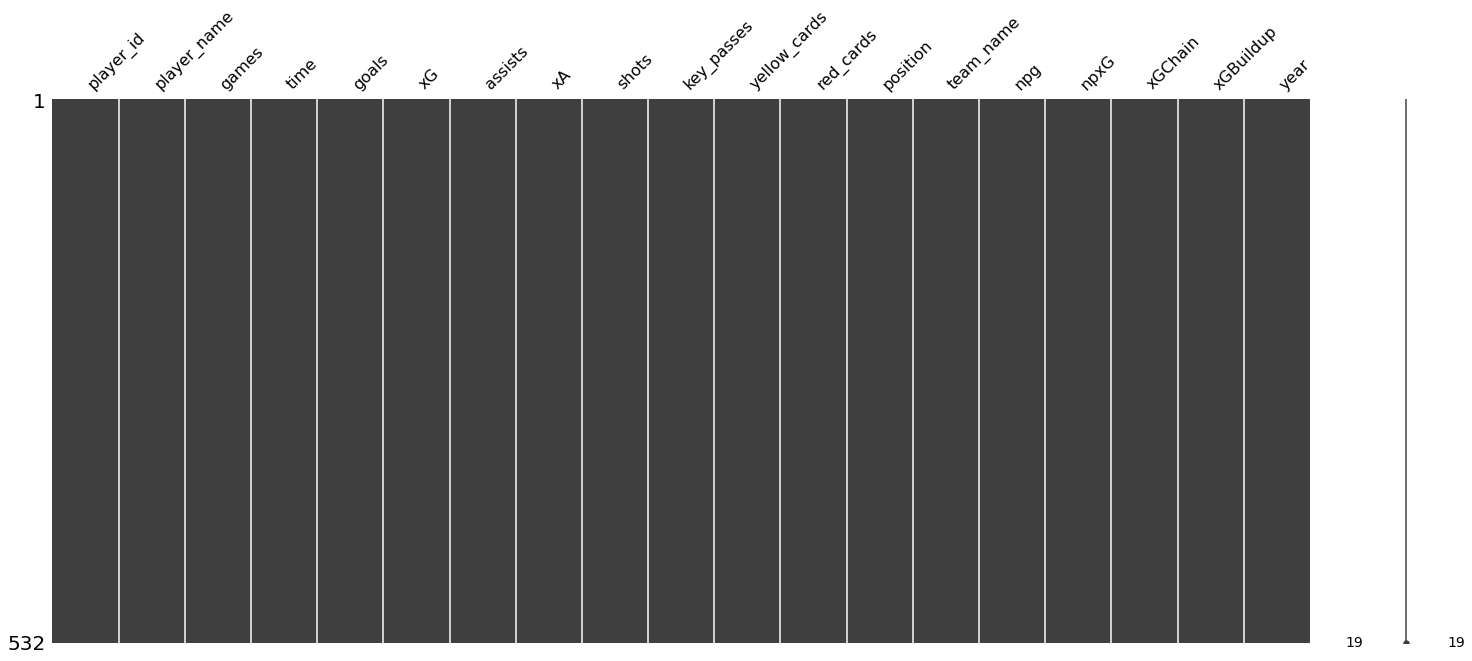

In [18]:
missingno.matrix(metaData)

In [19]:
meta_columns = list(metaData.columns)
meta_columns

['player_id',
 'player_name',
 'games',
 'time',
 'goals',
 'xG',
 'assists',
 'xA',
 'shots',
 'key_passes',
 'yellow_cards',
 'red_cards',
 'position',
 'team_name',
 'npg',
 'npxG',
 'xGChain',
 'xGBuildup',
 'year']

In [20]:
metaData['position'].nunique()

14

In [21]:
list(metaData['position'].unique())

['F',
 'F M S',
 'M S',
 'M',
 'D',
 'D S',
 'F S',
 'S',
 'GK',
 'D F M S',
 'D M S',
 'D M',
 'GK S',
 'F M']

In [22]:
metaData['position'].replace('F','Centre Forward', inplace = True)
metaData['position'].replace('F M S','Attacking Midfield', inplace = True)
metaData['position'].replace('M S','Centre Midfield', inplace = True)
metaData['position'].replace('M','Centre Midfield', inplace = True)
metaData['position'].replace('S','Substitute', inplace = True)
metaData['position'].replace('D F M S','Winger / Wing Back', inplace = True)
metaData['position'].replace('D M S','Full Back / Defensive Midfield', inplace = True)
metaData['position'].replace('D M','Full Back / Wing Back', inplace = True)
metaData['position'].replace('F M','Attacking Midfield', inplace = True)
metaData['position'].replace('F S','Centre Forward', inplace = True)
metaData['position'].replace('GK S','GoalKeeper', inplace = True)
metaData['position'].replace('D S','Full Back / Wing Back', inplace = True)
metaData['position'].replace('D','Centre Back', inplace = True)
metaData['position'].replace('GK','GoalKeeper', inplace = True)

metaData['position'].unique()

array(['Centre Forward', 'Attacking Midfield', 'Centre Midfield',
       'Centre Back', 'Full Back / Wing Back', 'Substitute', 'GoalKeeper',
       'Winger / Wing Back', 'Full Back / Defensive Midfield'],
      dtype=object)

In [23]:
# Expected goals per match = expected goals / total no of games played
metaData['xG/90'] = metaData['xG'] / metaData['games']
# Goals per match = goals / total no of games played
metaData['G/90'] = metaData['goals'] / metaData['games']
# Expected assists per match = expected assists / total no of games played
metaData['xA/90'] = metaData['xA'] / metaData['games'] 
# Assists per match = assists / total no of games played
metaData['A/90'] = metaData['assists'] / metaData['games']
# Shots per match = shots / total no of games played
metaData['shots/90'] = metaData['shots'] / metaData['games'] 
# Key passes per match = key passes / total no of games played
metaData['keyPasses/90'] = metaData['key_passes'] / metaData['games']
# Non-penalty goal per match = non-penalty goals / total no of games played
metaData['npg/90'] = metaData['npg'] / metaData['games']
# Non-penalty expected goal per match = non-penalty expected goals / total no of games played
metaData['npxG/90'] = metaData['npxG'] / metaData['games']
# Expected goal chain per match = expected goal chain / total no of games played
metaData['xGChain/90'] = metaData['xGChain'] / metaData['games']
# Expected goals build up per match = expected goal build up / total no of games played
metaData['xGBuildup/90'] = metaData['xGBuildup'] / metaData['games']

## Assumptions made
- A match equals 90 minutes
- Each player played the full 90 minutes in each match

In [24]:
player_stats  = pd.DataFrame(metaData.groupby(['player_id', 'player_name', 'position', 'team_name', 'xG',  'xG/90', 'xA', 'xA/90', 'npg', 'npg/90', 'npxG', 'npxG/90', 'xGChain', 'xGChain/90',
 'xGBuildup', 'key_passes', 'keyPasses/90', 'shots', 'shots/90', 'games','assists']).goals.sum())
player_stats.sort_values(by='goals', ascending = False, inplace = True)
# Returning the top 5 players with the highest number of goals
player_stats_goals = player_stats.reset_index()
player_stats_goals.head()

,player_id,player_name,position,team_name,xG,xG/90,xA,xA/90,npg,npg/90,npxG,npxG/90,xGChain,xGChain/90,xGBuildup,key_passes,keyPasses/90,shots,shots/90,games,assists,goals
0,647,Harry Kane,Centre Forward,Tottenham,22.174859,0.633567,7.577094,0.216488,19,0.542857,19.130183,0.546577,24.995648,0.714161,4.451257,49,1.400000,138,3.942857,35,14,23
1,1250,Mohamed Salah,Attacking Midfield,Liverpool,20.250847,0.547320,6.528526,0.176447,16,0.432432,15.683834,0.423887,28.968234,0.782925,9.800236,55,1.486486,126,3.405405,37,5,22
2,1228,Bruno Fernandes,Centre Midfield,Manchester United,16.019454,0.432958,11.474996,0.310135,9,0.243243,8.407840,0.227239,26.911412,0.727335,11.932285,95,2.567568,121,3.270270,37,12,18
3,822,Patrick Bamford,Centre Forward,Leeds,18.401863,0.484260,3.782247,0.099533,15,0.394737,16.879525,0.444198,23.394953,0.615657,4.131796,30,0.789474,107,2.815789,38,7,17
4,453,Son Heung-Min,Attacking Midfield,Tottenham,11.023287,0.297927,9.512992,0.257108,16,0.432432,10.262118,0.277355,20.671916,0.558700,6.608751,75,2.027027,68,1.837838,37,10,17


In [25]:
player_stats.sort_values(by='assists', ascending = False, inplace = True)
# Returning the top 5 players with the highest number of assists
player_stats_assists = player_stats[:5].reset_index()
player_stats_assists

,player_id,player_name,position,team_name,xG,xG/90,xA,xA/90,npg,npg/90,npxG,npxG/90,xGChain,xGChain/90,xGBuildup,key_passes,keyPasses/90,shots,shots/90,games,assists,goals
0,647,Harry Kane,Centre Forward,Tottenham,22.174859,0.633567,7.577094,0.216488,19,0.542857,19.130183,0.546577,24.995648,0.714161,4.451257,49,1.400000,138,3.942857,35,14,23
1,447,Kevin De Bruyne,Centre Midfield,Manchester City,9.983439,0.399338,10.958207,0.438328,4,0.160000,7.699933,0.307997,22.516893,0.900676,11.297133,79,3.160000,81,3.240000,25,12,6
2,1228,Bruno Fernandes,Centre Midfield,Manchester United,16.019454,0.432958,11.474996,0.310135,9,0.243243,8.407840,0.227239,26.911412,0.727335,11.932285,95,2.567568,121,3.270270,37,12,18
3,675,Jack Grealish,Attacking Midfield,Aston Villa,5.192684,0.199719,9.334137,0.359005,6,0.230769,5.192684,0.199719,17.487469,0.672595,6.972044,81,3.115385,50,1.923077,26,10,6
4,453,Son Heung-Min,Attacking Midfield,Tottenham,11.023287,0.297927,9.512992,0.257108,16,0.432432,10.262118,0.277355,20.671916,0.558700,6.608751,75,2.027027,68,1.837838,37,10,17


# Radar plot

In [26]:
# Getting the maximum and minimum range values
value_df = player_stats_goals.drop(['player_id', 'player_name', 'position', 'team_name', 'games'], axis = 1)
column = value_df.columns
for i in column:
  maximum = value_df[i].max()
  minimum = value_df[i].min()
  print(i,  'max = ', round(maximum, 2))
  print(i, 'min = ', round(minimum,2))

xG max =  22.17
xG min =  0.0
xG/90 max =  0.63
xG/90 min =  0.0
xA max =  11.47
xA min =  0.0
xA/90 max =  0.44
xA/90 min =  0.0
npg max =  19
npg min =  0
npg/90 max =  0.57
npg/90 min =  0.0
npxG max =  19.13
npxG min =  0.0
npxG/90 max =  0.55
npxG/90 min =  0.0
xGChain max =  28.97
xGChain min =  0.0
xGChain/90 max =  1.0
xGChain/90 min =  0.0
xGBuildup max =  18.97
xGBuildup min =  0.0
key_passes max =  95
key_passes min =  0
keyPasses/90 max =  3.16
keyPasses/90 min =  0.0
shots max =  138
shots min =  0
shots/90 max =  3.94
shots/90 min =  0.0
assists max =  14
assists min =  0
goals max =  23
goals min =  0


In [27]:
metaData['player_name']

0          Ollie Watkins
1         Anwar El Ghazi
2        Bertrand Traoré
3          Jack Grealish
4           Ross Barkley
             ...        
527     Jamie Shackleton
528    Ian Poveda-Ocampo
529           Leif Davis
530        Niall Huggins
531      Gaetano Berardi
Name: player_name, Length: 532, dtype: object

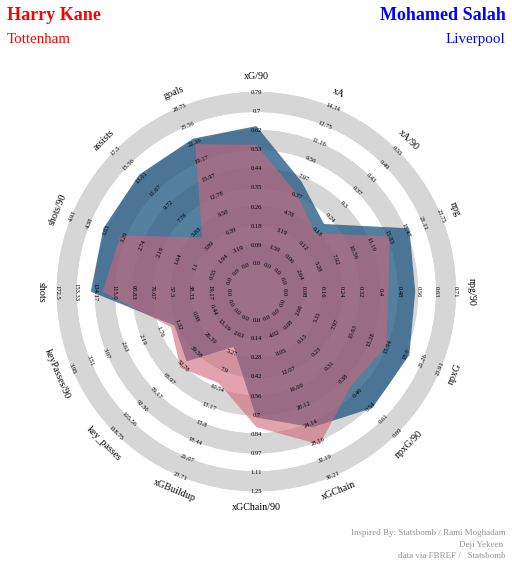

In [28]:
def radarChart(player1,player2):
    #Selecting data for the players being compared
    df = player_stats_goals[(player_stats_goals['player_name']== player1) | (player_stats_goals['player_name']== player2)].reset_index()
    #dropping columns
    df =  player_stats_goals.drop(['player_id', 'player_name', 'position', 'team_name', 'games'], axis = 1)
    #get parameters
    squad1 = player_stats_goals['team_name'][0]
    squad1

    squad2 = player_stats_goals['team_name'][1]
    squad2
    params = list(df.columns)
    params = params[1:]
    params
    # add ranges to list of tuple pairs
    ranges = []
    a_values = []
    b_values = []

    for x in params:
        a = min(df[params][x])
        a = a - (a * 0.25)
        b = max(df[params][x])
        b = b + (b * 0.25)

        ranges.append((a,b))

    for x in range(len(player_stats_goals['player_name'])):
        if player_stats_goals['player_name'][x] == player1:
            a_values = df.iloc[x].values.tolist()
        if player_stats_goals['player_name'][x] == player2:
            b_values = df.iloc[x].values.tolist()

    a_values = a_values[1:]
    b_values = b_values[1:]

    values  = [a_values, b_values]
    #title 
    title = dict(
        title_name =player1,
        title_color = 'red',
        subtitle_name = squad1,
        subtitle_color = 'red',
        title_name_2 =player2,
        title_color_2 = 'blue',
        subtitle_name_2 = squad2,
        subtitle_color_2 = 'blue',
        title_fontsize = 18,
        subtitle_fontsize = 15
    )

    endnote = 'Deji Yekeen \ndata via FBREF /   Statsbomb'

    radar = Radar()

    fig, ax = radar.plot_radar(ranges=ranges, params=params,values=values,
                                radar_color=['#1c547f', '#CF6679'],
                                alphas=[.75, .6],
                                title=title,
                                endnote=endnote,
                                compare=True)
# All you have to do is select the names of the players you want to compare and their stats will be plotted. 
radarChart(player1='Harry Kane',player2='Mohamed Salah')